In [1]:
from stable_baselines3 import A2C, PPO
from envs import VectorisedSupplyChain

import matplotlib.pyplot as plt
import warnings
import numpy as np


warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True

/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_po

In [2]:
num_envs = 100
max_time = 20000

env = VectorisedSupplyChain(num_envs, 'test')

env.node_df


Loaded setup: test:



,nodes,node_inv_init,node_prod_cost,node_prod_time,node_hold_cost,node_prod_capacity,node_inv_capacity,node_pos_x,node_pos_y
0,0,0.0,0.0,2,0.01,inf,100.0,0,0
1,1,0.0,0.0,5,0.02,inf,100.0,100,0
2,2,0.0,0.0,5,0.04,inf,100.0,200,-100
3,3,0.0,0.0,6,0.01,inf,100.0,200,0
4,4,0.0,0.0,3,0.02,inf,100.0,200,100
5,5,0.0,0.0,7,0.07,inf,100.0,300,-100
6,6,0.0,0.0,5,0.01,inf,100.0,300,100
7,7,0.0,0.0,0,0.00,inf,inf,400,100
8,8,0.0,0.0,0,0.00,inf,inf,400,-100


In [3]:
env.edge_df

,edge_sender,edge_reciever,edge_trans_time,edge_cost,edge_hold_cost,edge_prod_yield
0,8,6,6,0.20,0.000,1.0
1,8,5,2,0.07,0.002,1.0
2,7,5,1,0.05,0.005,1.0
3,7,4,3,0.15,0.000,1.0
4,6,3,12,0.80,0.004,1.0
5,6,2,11,0.75,0.007,1.0
6,5,2,9,0.70,0.005,1.0
7,4,3,10,0.80,0.006,1.0
8,4,2,8,1.00,0.008,1.0
9,3,1,3,1.60,0.015,1.0


In [4]:
model = PPO('MlpPolicy', env, verbose=2, n_steps=10)
model.learn(total_timesteps=num_envs*max_time)

Using cpu device
------------------------------
| time/              |       |
|    fps             | 40788 |
|    iterations      | 1     |
|    time_elapsed    | 0     |
|    total_timesteps | 1000  |
------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6153         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 2000         |
| train/                  |              |
|    approx_kl            | 0.0143730305 |
|    clip_fraction        | 0.199        |
|    clip_range           | 0.2          |
|    entropy_loss         | -17          |
|    explained_variance   | -0.845       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0325      |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0273      |
|    std                  | 0.993        |
|    value_loss           | 0.0352 

KeyboardInterrupt: 

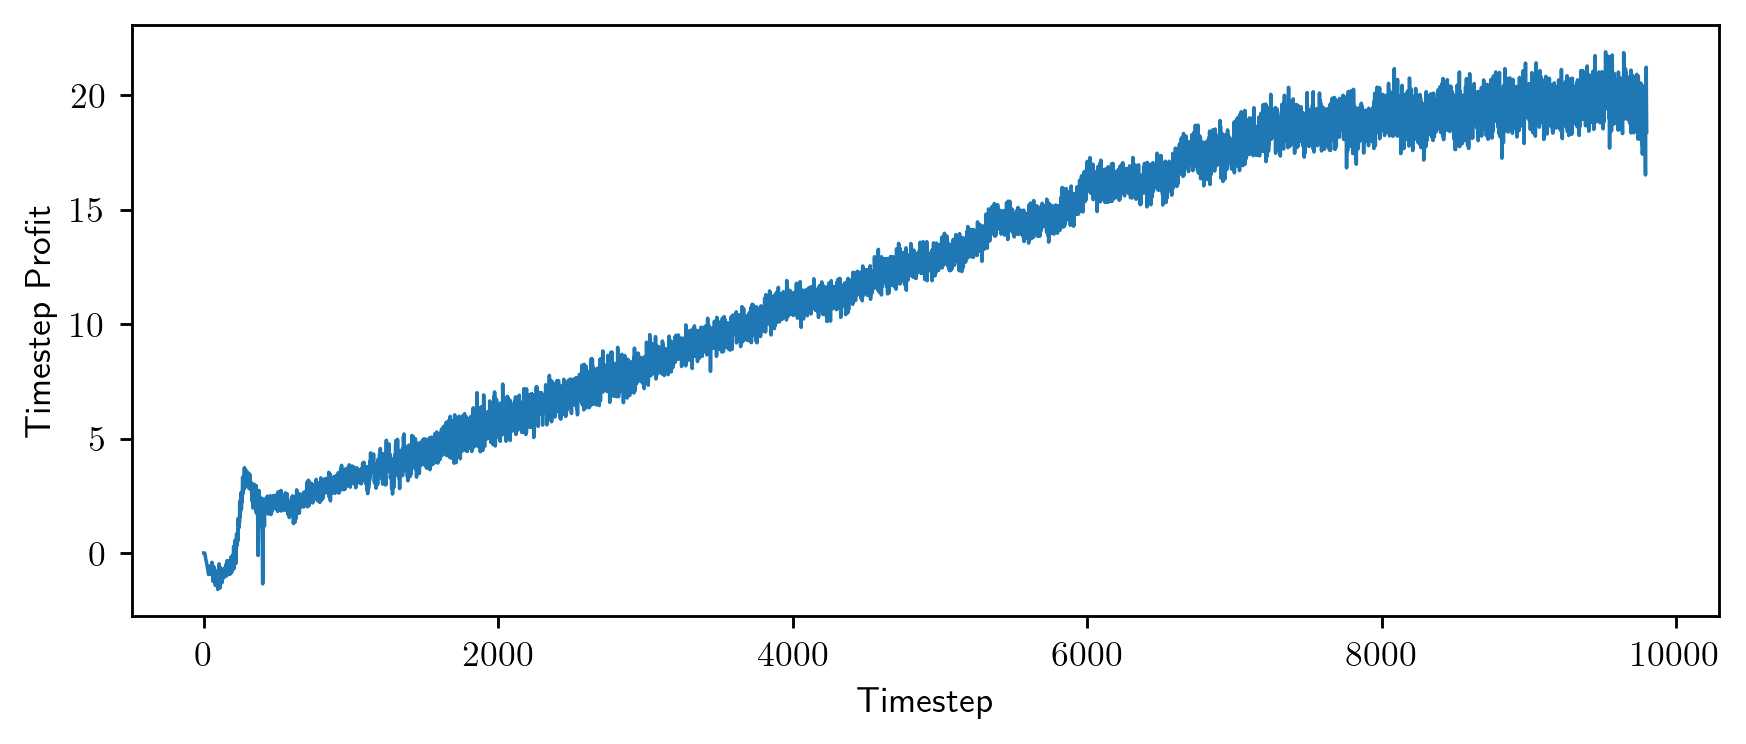

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)

ax.plot(env.mean_rewards[:9800], color='tab:blue', linewidth=1.0)
ax.set_xlabel('Timestep')
ax.set_ylabel('Timestep Profit')

fig.show()

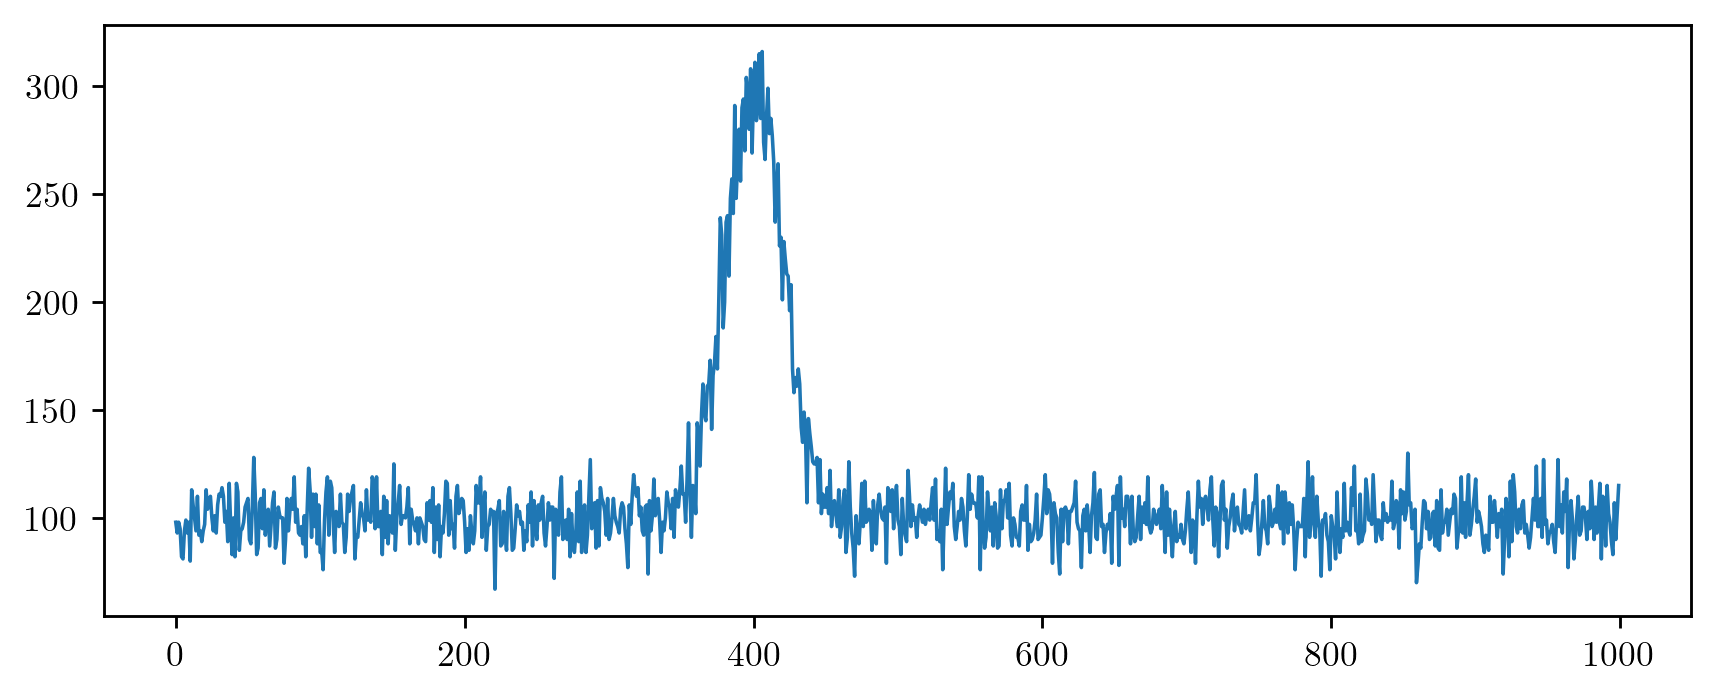

In [ ]:
from scipy.stats import poisson, norm


ts = np.arange(1000)

xs = [poisson(100 + 10*np.sin(2*t*np.pi/7) + 20*np.sin(2*t*np.pi/365)).rvs() for t in range(1000)]
xs = [poisson(100 + 10000*norm.pdf(t, 400, 20)).rvs() for t in range(1000)]
#xs = [0]

##for i in range(1, 1000):
#    xs.append(norm(loc=xs[i-1], scale=1.0).rvs())

fig, ax = plt.subplots()
fig.set_size_inches(8, 3)

ax.plot(ts, xs, color='tab:blue', linewidth=1.0)

fig.show()